# Data Merging Basics
Learn how you can merge disparate data using inner joins. By combining information from multiple sources you’ll uncover compelling insights that may have previously been hidden. You’ll also learn how the relationship between those sources, such as one-to-one or one-to-many, can affect your result.

In [5]:
import os
cur_dir = os.getcwd()
cur_dir

'/private/var/mobile/Containers/Data/Application/97C691C6-1261-47C0-85FD-B011412DD64C/Library/Caches'

In [7]:
jupyter --path

NameError: name 'jupyter' is not defined

In [3]:
import pandas as pd
import os
cur_dir = os.getcwd()
wards = pd.read_pickle('{cur_dir}/datasets/ward.p')
census = pd.read_pickle('{cur_dir}/datasets/census.p')

FileNotFoundError: [Errno 2] No such file or directory: '{cur_dir}/datasets/ward.p'

## Theory

In [2]:
wards.info()
print(wards.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ward      50 non-null     object
 1   alderman  50 non-null     object
 2   address   50 non-null     object
 3   zip       50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB
  ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649


In [3]:
census.info()
print(census.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ward      50 non-null     object
 1   pop_2000  50 non-null     int64 
 2   pop_2010  50 non-null     int64 
 3   change    50 non-null     object
 4   address   50 non-null     object
 5   zip       50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB
  ward  pop_2000  pop_2010 change                                  address  \
0    1     52951     56149     6%              2765 WEST SAINT MARY STREET   
1    2     54361     55805     3%                 WM WASTE MANAGEMENT 1500   
2    3     40385     53039    31%                      17 EAST 38TH STREET   
3    4     51953     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL   
4    5     55302     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE   

     zip  
0  60647  
1  60622  
2  60653  
3  60653  
4  60637  


### Merge the two database on ward column

In [4]:
print(wards.shape)
print(census.shape)

(50, 4)
(50, 6)


As we can see, both DataFrame have the same number of rows but different numbers of columns.

In [5]:
ward_census = wards.merge(census, on = 'ward')
ward_census.head()

,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


### We can change the append _x on the common columns name setting it on merge funcion

In [6]:
wards_census = wards.merge(census, on = 'ward', suffixes = ('_ward','_cen'))
wards_census.head()

,ward,alderman,address_ward,zip_ward,pop_2000,pop_2010,change,address_cen,zip_cen
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


## Excercises

## Your first inner join

You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the `taxi_owners` and `taxi_veh` tables together on the `vid` column. You can then use the merged table along with the `.value_counts()` method to find the most common `fuel_type`.

Since you'll be working with pandas throughout the course, the package will be preloaded for you as pd in each exercise in this course. Also the `taxi_owners` and `taxi_veh` DataFrames are loaded for you.

In [7]:
taxi_owners = pd.read_pickle('datasets/taxi_owners.p')
taxi_vehicles = pd.read_pickle('datasets/taxi_vehicles.p')

#### 1 - Merge `taxi_owners` with `taxi_veh` on the column `vid`, and save the result to `taxi_own_veh`.

In [8]:
taxi_owners.info()
taxi_owners.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3519 entries, 0 to 3518
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   rid      3519 non-null   object
 1   vid      3519 non-null   object
 2   owner    3519 non-null   object
 3   address  3519 non-null   object
 4   zip      3519 non-null   object
dtypes: object(5)
memory usage: 137.6+ KB


,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [9]:
taxi_vehicles.info()
taxi_vehicles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3519 entries, 0 to 3518
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vid        3519 non-null   object
 1   make       3519 non-null   object
 2   model      3519 non-null   object
 3   year       3519 non-null   int64 
 4   fuel_type  3519 non-null   object
 5   owner      3519 non-null   object
dtypes: int64(1), object(5)
memory usage: 165.1+ KB


,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [10]:
taxi_own_veh = taxi_owners.merge(taxi_vehicles, on = 'vid')
taxi_own_veh.head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


#### 2 - Set the left and right table suffixes for overlapping columns of the merge to `_own` and `_veh`, respectively.

In [11]:
taxi_own_veh = taxi_owners.merge(taxi_vehicles, on = 'vid', suffixes = ('_own','_veh'))
taxi_own_veh.columns

Index(['rid', 'vid', 'owner_own', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')

#### 3 - Select the fuel_type column from `taxi_own_veh` and print the `value_counts()` to find the most popular `fuel_types` used.

In [41]:
taxi_own_veh['fuel_type'].value_counts()

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64

### Inner joins and number of rows returned

All of the merges you have studied to this point are called inner joins. It is necessary to understand that inner joins only return the rows with matching values in both tables. You will explore this further by reviewing the merge between the wards and census tables, then comparing it to merges of copies of these tables that are slightly altered, named wards_altered, and census_altered. The first row of the wards column has been changed in the altered tables. You will examine how this affects the merge between them. The tables have been loaded for you.

For this exercise, it is important to know that the wards and census tables start with 50 rows.

### Instruction 1/3 
1 - Merge `wards` and `census` on the ward column and save the result to `wards_census`.

In [13]:
wards_census = wards.merge(census, on = 'ward')
print('wards_census table shape:', wards_census.shape)

wards_census table shape: (50, 9)


Great job! In step 1, the `.merge()` returned a table with the same number of rows as the original wards table. 
However, in steps 2 and 3, using the altered tables with the altered first row of the ward column, the number of returned rows was fewer. There was not a matching value in the ward column of the other table. 
**Remember that `.merge()` only returns rows where the values match in both tables.**

### Instructions 2/3
Merge the `wards_altered` and census tables on the ward column, and notice the difference in returned rows.

In [14]:
wards_alterated = wards
wards_alterated.iloc[0,0]=61
wards_alterated.to_pickle('datasets/wards_alterated.p')

In [15]:
wards_alterated = pd.read_pickle('datasets/wards_alterated.p')
wards_alterated.head()

,ward,alderman,address,zip
0,61,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [16]:
wards_alterated_census = wards_alterated.merge(census, on = 'ward')
wards_alterated_census.shape

(49, 9)

### Instructions 3/3
Merge the wards and `census_altered` tables on the `ward` column, and notice the difference in returned rows.

In [17]:
census_alterated = census
census_alterated.iloc[0,0] = "None"
census_alterated.to_pickle('datasets/census_alterated.p')

In [18]:
census_alterated = pd.read_pickle('datasets/census_alterated.p')
wards_census_altered = wards.merge(census_alterated, on = 'ward')
wards_census_altered.shape

(49, 9)

### One-to-many merge

A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called `biz_owners`, to the `licenses` table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

In [19]:
licenses = pd.read_pickle('datasets/licenses.p')
biz_owners = pd.read_pickle('datasets/business_owners.p')

In [20]:
licenses.info()
licenses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   account   10000 non-null  object
 1   ward      10000 non-null  object
 2   aid       4657 non-null   object
 3   business  10000 non-null  object
 4   address   10000 non-null  object
 5   zip       9996 non-null   object
dtypes: object(6)
memory usage: 468.9+ KB


,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [21]:
biz_owners.info()
biz_owners.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21352 entries, 0 to 21351
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   account     21352 non-null  object
 1   first_name  20721 non-null  object
 2   last_name   20695 non-null  object
 3   title       21341 non-null  object
dtypes: object(4)
memory usage: 667.4+ KB


,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


### Instruction 1/3 
1. Starting with the licenses table on the left, merge it to the biz_owners table on the column account, and save the results to a variable named licenses_owners.

In [22]:
licenses_owners = licenses.merge(biz_owners, on = 'account')
licenses_owners.head()

,account,ward,aid,business,address,zip,first_name,last_name,title
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,ROBERT,GLICK,MEMBER
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,PRESIDENT
2,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,SECRETARY
3,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,WALTER,MROZEK,PARTNER
4,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,CELINA,BYRDAK,PARTNER


### Instruction 2/3
2. Group licenses_owners by title and count the number of accounts for each title. Save the result as counted_df

In [23]:
counted_df = licenses_owners.groupby('title').agg({'account':'count'})
# agg: we can pass a dict of axis labels (in this case 'account') -> functions, function names or list of such.
counted_df.head()

,account
title,
ASST. SECRETARY,111
BENEFICIARY,4
CEO,110
DIRECTOR,146
EXECUTIVE DIRECTOR,10


### Instruction 3/3
3. Sort `counted_df` by the number of accounts in descending order, and save this as a variable named `sorted_df`.

In [24]:
sorted_df = counted_df.sort_values(by='account', ascending = False)
sorted_df.head()

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970


After merging the tables together, you counted the number of repeated rows with the combination of `.groupby()` and `.agg()` statements. You see that president, followed by secretary, are the most common business owner titles.

### Total riders in a month

Your goal is to find the total number of rides provided to passengers passing through the Wilson station (`station_name == 'Wilson'`) when riding Chicago's public transportation system on weekdays (`day_type == 'Weekday'`) in July (`month == 7`). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

The cal, ridership, and stations DataFrames have been loaded for you. The relationship between the tables can be seen in the diagram below.

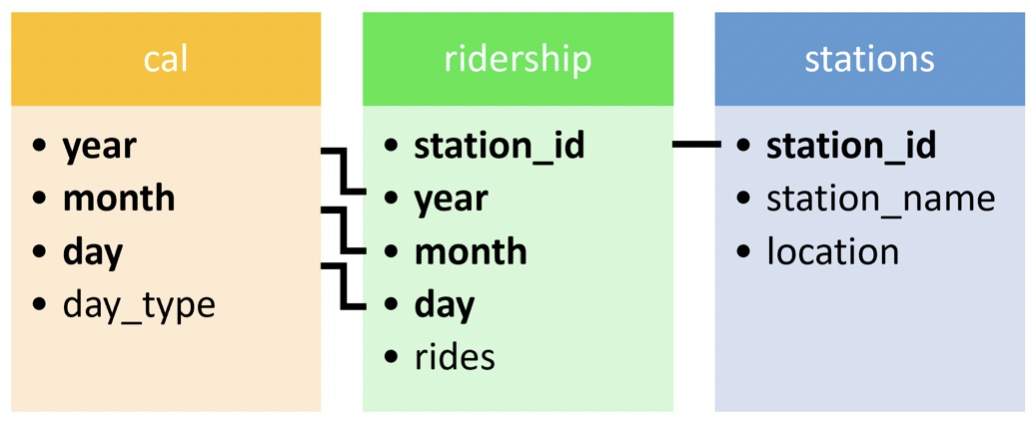

In [25]:
ridership = pd.read_pickle('datasets/cta_ridership.p')
cal = pd.read_pickle('datasets/cta_calendar.p')
stations = pd.read_pickle('datasets/stations.p')

### Instruction 1/3
**1.** Merge the `ridership` and `cal` tables together, starting with the ridership table on the left and save the result to the variable `ridership_cal`. If you code takes too long to run, your merge conditions might be incorrect.

In [43]:
ridership_cal = ridership.merge(cal)
# ridership_cal = ridership.merge(cal, on = ['year','month','day'])
ridership_cal.head()

,station_id,year,month,day,rides,day_type
0,40010,2019,1,1,576,Sunday/Holiday
1,40080,2019,1,1,1839,Sunday/Holiday
2,40770,2019,1,1,2724,Sunday/Holiday
3,40120,2019,1,1,754,Sunday/Holiday
4,40540,2019,1,1,2175,Sunday/Holiday


### Instruction 2/3
**2.** Extend the previous merge to three tables by also merging the stations table.

In [27]:
#ridership_cal_stations = ridership_cal.merge(stations, on = 'station_id')
ridership_cal_stations = ridership.merge(cal, on = ['year','month','day']).merge(stations, on = 'station_id')
ridership_cal_stations.head()

,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"


### Instruction 3/3
**3.** Create a variable called `filter_criteria` to select the appropriate rows from the merged table so that you can sum the rides column.

Your goal is to find the total number of rides provided to passengers passing through the Wilson station (`station_name == 'Wilson'`) when riding Chicago's public transportation system on weekdays (`day_type == 'Weekday'`) in July (`month == 7`)

In [46]:
filter_criteria = ((ridership_cal_stations['month'] == 7)
                   & (ridership_cal_stations['day_type'] == 'Weekday')
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

In [47]:
ridership_cal_stations.loc[filter_criteria,'rides'].sum()

140005

### Three table merge

To solidify the concept of a three DataFrame merge, practice another exercise. A reasonable extension of our review of Chicago business data would include looking at demographics information about the neighborhoods where the businesses are. A table with the median income by zip code has been provided to you. You will merge the `licenses` and `wards` tables with this new income-by-zip-code table called `zip_demo`.

In [30]:
licenses = pd.read_pickle('datasets/licenses.p')
wards = pd.read_pickle('datasets/ward.p')
zip_demo = pd.read_pickle('datasets/zip_demo.p')

In [31]:
licenses.info()
licenses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   account   10000 non-null  object
 1   ward      10000 non-null  object
 2   aid       4657 non-null   object
 3   business  10000 non-null  object
 4   address   10000 non-null  object
 5   zip       9996 non-null   object
dtypes: object(6)
memory usage: 468.9+ KB


,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [32]:
wards.info()
wards.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ward      50 non-null     object
 1   alderman  50 non-null     object
 2   address   50 non-null     object
 3   zip       50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [33]:
zip_demo.info()
zip_demo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     66 non-null     object
 1   income  66 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


### Instruction 1/2
**1.** Starting with the `licenses` table, merge to it the `zip_demo` table on the `zip` column. Then merge the resulting table to the `wards` table on the ward column. Save result of the three merged tables to a variable named `licenses_zip_ward`.

In [34]:
licenses_zip_ward = licenses.merge(zip_demo, on = 'zip').merge(wards, on = 'ward')
licenses_zip_ward.head()

,account,ward,aid,business,address_x,zip_x,income,alderman,address_y,zip_y
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
1,11280,3,763,PRIME WAY,2251 S STATE ST 1ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
2,15015,3,NaN,"SOUTHVIEW MANOR, INC.",3311 S MICHIGAN AVE,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
3,19168,3,666,BP AMOCO,3101 S MICHIGAN AVE 1ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
4,205980,3,763,J & J FISH & CHICKEN,8 E CERMAK RD,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609


### Instruction 2/2
**2.** Group the results of the three merged tables by the column `alderman` and find the `median` `income`.

In [51]:
licenses_zip_ward.groupby('alderman').agg({'income':'median'}).sort_values('income', ascending = False)

,income
alderman,
Brendan Reilly,110215.0
William D. Burns,107811.0
Michelle Smith,100116.0
Tom Tunney,88708.0
Brian Hopkins,87143.0
"Proco ""Joe"" Moreno",87143.0
"Walter Burnett, Jr.",87143.0
Anthony V. Napolitano,82226.0
James Cappleman,79565.0


With the merged data, you can complete your income analysis. You see that only a few aldermen represent businesses in areas where the median income is greater than $62,000, which is the median income for the state of Illinois.

### One-to-many merge with multiple tables

In this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The `land_use` table has info on the percentage of vacant land by city ward. The `census` table has population by ward, and the `licenses` table lists businesses by ward.

In [58]:
land_use = pd.read_pickle('datasets/land_use.p')
census = pd.read_pickle('datasets/census.p')
licenses = pd.read_pickle('datasets/licenses.p')
print('land_use shape:', land_use.shape, '- census shape:', census.shape, '- licenses shape:', licenses.shape)

land_use shape: (50, 6) - census shape: (50, 6) - licenses shape: (10000, 6)


### Instruction 1/3
**1.** Merge `land_use` and `census` on the `ward` column. Merge the result of this with `licenses` on the `ward` column, using the suffix `_cen` for the left table and `_lic` for the right table. Save this to the variable `land_cen_lic`.

In [37]:
land_cen_lic = land_use.merge(census, on = 'ward').merge(licenses, on = 'ward', suffixes=('_cen','_lic'))
print(land_cen_lic.shape)
land_cen_lic.head()

(10000, 16)


,ward,residential,commercial,industrial,vacant,other,pop_2000,pop_2010,change,address_cen,zip_cen,account,aid,business,address_lic,zip_lic
0,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


### Instruction 2/3
**2.** Group `land_cen_lic` by `ward`, `pop_2010` (the population in 2010), and `vacant`, then count the number of accounts. Save the results to `pop_vac_lic`.

In [38]:
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'],as_index = False).agg({'account':'count'})
pop_vac_lic.head()

,ward,pop_2010,vacant,account
0,1,56149,2,253
1,10,51535,14,130
2,11,51497,5,201
3,12,52235,4,255
4,13,53722,1,101


### Instruction 3/3
**3.** Sort `pop_vac_lic` by `vacant`, `account`, and `pop_2010` in `descending`, `ascending`, and `ascending` order respectively. Save it as `sorted_pop_vac_lic`.

In [39]:
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant','account','pop_2010'], ascending = (False,True,True))
sorted_pop_vac_lic.head()

,ward,pop_2010,vacant,account
47,7,51581,19,80
12,20,52372,15,123
1,10,51535,14,130
16,24,54909,13,98
7,16,51954,13,156


You merged multiple tables with varying relationships and added suffixes to make your column names clearer.
Using your skills, you were able to pull together information from different tables to see that the 7th ward would be a good place to build your goat farm!